#순환 신경망

순차 데이터에 대해서 순환 신경망을 사용한다

순차 데이터란 시계열 데이터나 텍스트에 대해 말을 한다. 순차 데이터의 핵심은 이전의 데이터를 기억하는 것이다. 텍스트로 예를 들자면 "추천해요"만 보면 긍정적인 형태로 보일지 모르겠지만, "별로이지만 추천해요"라는 전체적인 맥락을 보면 그닥 긍정적인 것으로 이해가 어렵다

이전에 배웠던 완전 연결 신경망이나, 합성곱 신경망 등 이렇게 입력데이터의 흐름이 앞으로만 전달되는 신경망을 피드포워드 신경망이라고 한다.

순환 신경망의 핵심은 루프가 있다는 것이다.

In [6]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)

In [8]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [10]:
print(len(train_input[1]))

189


In [12]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [14]:
print(train_target[0:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [16]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [18]:
import numpy as np
lenghts = np.array([len(x) for x in train_input])
print(np.mean(lenghts), np.median(lenghts))

239.00925 178.0


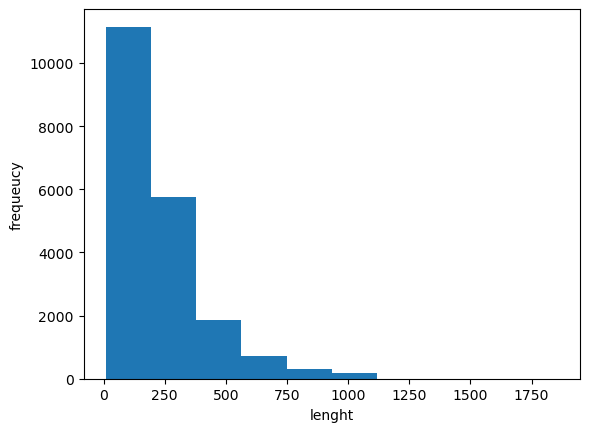

In [20]:
import matplotlib.pyplot as plt
plt.hist(lenghts)
plt.xlabel('lenght')
plt.ylabel('frequeucy')
plt.show()

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [24]:
print(train_seq.shape)

(20000, 100)


In [26]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [28]:
val_seq = pad_sequences(val_input, maxlen=100)

In [30]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100, 300)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

이 숫자는 우선 되는 것이 아니다 단지 원-핫 인코딩 되어야 모든 단어가 동등한 위치에서 값을 출력할 것이다. 그래서 300단어를 사용했다는 것에서 착안해 300크기의 배열을 사용한다

In [33]:
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)
val_oh = keras.utils.to_categorical(val_seq)

(20000, 100, 300)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           2,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, validation_data=(val_oh, val_target),batch_size=64 , callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4908 - loss: 0.7007 - val_accuracy: 0.4946 - val_loss: 0.6973
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4987 - loss: 0.6965 - val_accuracy: 0.5044 - val_loss: 0.6940
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5206 - loss: 0.6923 - val_accuracy: 0.5420 - val_loss: 0.6882
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5544 - loss: 0.6849 - val_accuracy: 0.5826 - val_loss: 0.6775
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5974 - loss: 0.6730 - val_accuracy: 0.6112 - val_loss: 0.6655
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6173 - loss: 0.6624 - val_accuracy: 0.6382 - val_loss: 0.6519
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6446 - loss: 0.6460 - val_accuracy: 0.6622 - val_loss: 0.6363
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6644 - loss: 0.6316 - val_acc

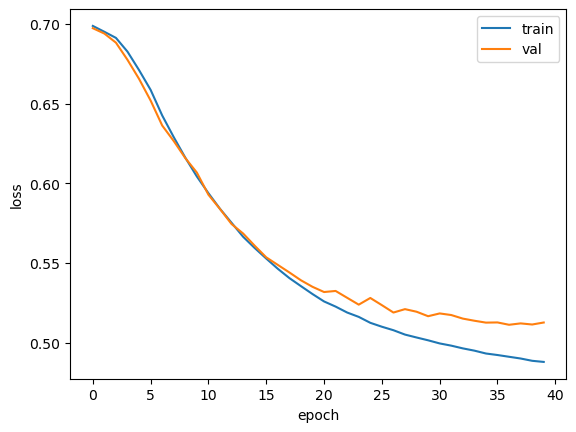

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [41]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4800000000


다음과 같이 원-힛 인코딩시 메모리적인 측면에서 굉장한 손실을 가지게 된다. 그래서 우리는 다른 방법을 찾아보려고 한다.

##단어 임베딩을 사용해보자!

단어 임베딩이란 각 단어를 고정된 실수 벡터로 바꾸어준다. 이 벡터는 원힛 인코딩 보다 훨씬 의미있는 값으로 채워져 있을 뿐만 아니라 성능도 좋아진다

In [61]:
model2 = keras.Sequential()
model2.add(keras.layers.Input(shape=(100,)))
model2.add(keras.layers.Embedding(300, 16))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [63]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 16)             │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 5,009 (19.57 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, validation_data=(val_seq, val_target),batch_size=64 , callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5097 - loss: 0.6962 - val_accuracy: 0.5976 - val_loss: 0.6747
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6146 - loss: 0.6686 - val_accuracy: 0.6644 - val_loss: 0.6480
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6687 - loss: 0.6419 - val_accuracy: 0.6586 - val_loss: 0.6406
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7014 - loss: 0.6198 - val_accuracy: 0.6976 - val_loss: 0.6103
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7215 - loss: 0.5991 - val_accuracy: 0.7044 - val_loss: 0.5983
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7306 - loss: 0.5817 - val_accuracy: 0.7304 - val_loss: 0.5749
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7416 - loss: 0.5656 - val_accuracy: 0.7244 - val_loss: 0.5725
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7475 - loss: 0.5518 - val_accu

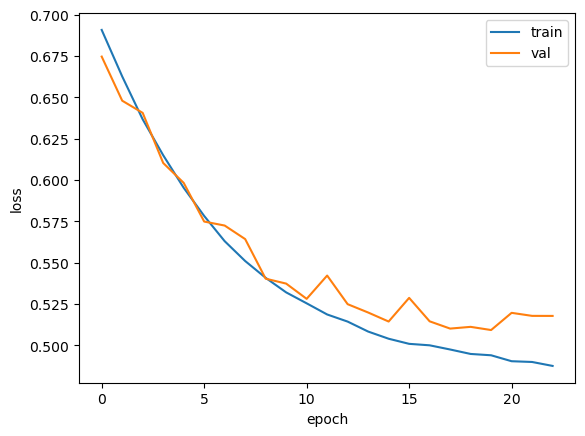

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##LSTM과 GRU

이전에 했던 SimpleRNN과는 복잡한 계산식을 가지고 있다. 일반적으로 멀리 떨어져있는 단어정보를 인식하기가 어렵기 때문에 이를 개선해고자 LSTM과 GRU 셀이 개발 되었다.

In [73]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

model3 = keras.Sequential()
model3.add(keras.layers.Input(shape=(100,)))
model3.add(keras.layers.Embedding(500, 16))
model3.add(keras.layers.LSTM(8))
model3.add(keras.layers.Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, validation_data=(val_seq, val_target),batch_size=64 , callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5368 - loss: 0.6926 - val_accuracy: 0.5836 - val_loss: 0.6915
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6078 - loss: 0.6903 - val_accuracy: 0.6202 - val_loss: 0.6873
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6283 - loss: 0.6849 - val_accuracy: 0.6520 - val_loss: 0.6719
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6757 - loss: 0.6582 - val_accuracy: 0.6924 - val_loss: 0.6173
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7179 - loss: 0.6015 - val_accuracy: 0.7244 - val_loss: 0.5868
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7396 - loss: 0.5772 - val_accuracy: 0.7192 - val_loss: 0.5764
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7492 - loss: 0.5583 - val_accuracy: 0.7526 - val_loss: 0.5496
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7620 - loss: 0.5403 - 

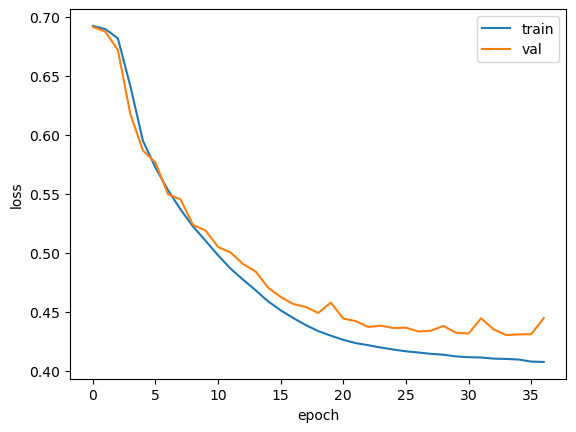

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [79]:
model4 = keras.Sequential()
model4.add(keras.layers.Input(shape=(100,)))
model4.add(keras.layers.Embedding(500, 16))
model4.add(keras.layers.LSTM(8, dropout=0.3))
model4.add(keras.layers.Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, validation_data=(val_seq, val_target),batch_size=64 , callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.5336 - val_loss: 0.6928
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5378 - loss: 0.6927 - val_accuracy: 0.5562 - val_loss: 0.6922
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5632 - loss: 0.6919 - val_accuracy: 0.5818 - val_loss: 0.6911
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5794 - loss: 0.6908 - val_accuracy: 0.6148 - val_loss: 0.6889
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6117 - loss: 0.6878 - val_accuracy: 0.6422 - val_loss: 0.6831
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6484 - loss: 0.6793 - val_accuracy: 0.6802 - val_loss: 0.6583
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6833 - loss: 0.6444 - val_accuracy: 0.7086 - val_loss: 0.6000
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7057 - loss: 0.5986 - 

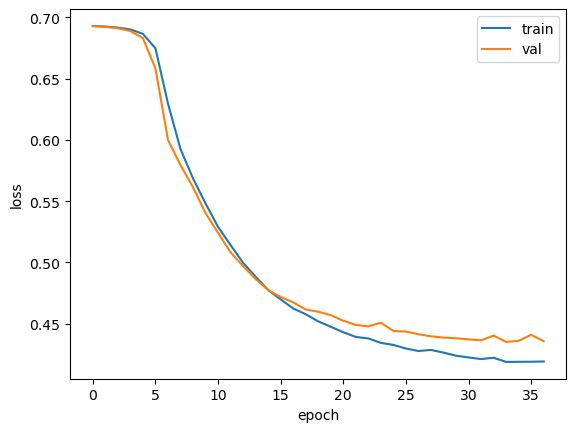

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [87]:
model5 = keras.Sequential()
model5.add(keras.layers.Input(shape=(100,)))
model5.add(keras.layers.Embedding(500, 16))
model5.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model5.add(keras.layers.LSTM(8, dropout=0.3))
model5.add(keras.layers.Dense(1, activation='sigmoid'))
model5.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model5.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model5.fit(train_seq, train_target, epochs=100, validation_data=(val_seq, val_target),batch_size=64 , callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5121 - loss: 0.6930 - val_accuracy: 0.5686 - val_loss: 0.6919
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5659 - loss: 0.6908 - val_accuracy: 0.6390 - val_loss: 0.6813
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6308 - loss: 0.6704 - val_accuracy: 0.6934 - val_loss: 0.6088
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7055 - loss: 0.5967 - val_accuracy: 0.7148 - val_loss: 0.5626
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7324 - loss: 0.5550 - val_accuracy: 0.7392 - val_loss: 0.5370
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7514 - loss: 0.5333 - val_accuracy: 0.7586 - val_loss: 0.5154
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7612 - loss: 0.5125 - val_accuracy: 0.7536 - val_loss: 0.5198
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7711 - loss: 0.4986 - 

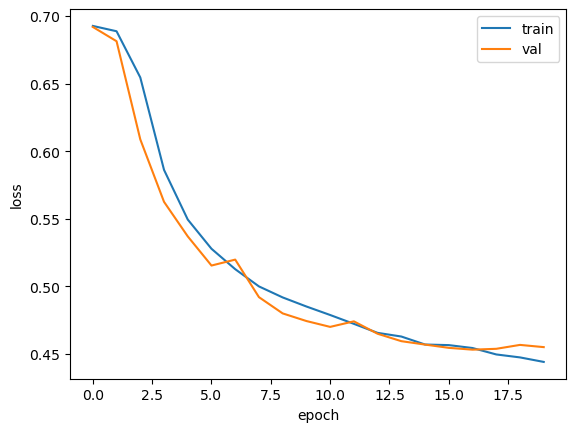

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [93]:
model6 = keras.Sequential()
model6.add(keras.layers.Input(shape=(100,)))
model6.add(keras.layers.Embedding(500, 16))
model6.add(keras.layers.GRU(8))
model6.add(keras.layers.Dense(1, activation='sigmoid'))
model6.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model6.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model6.fit(train_seq, train_target, epochs=100, validation_data=(val_seq, val_target),batch_size=64 , callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5164 - loss: 0.6930 - val_accuracy: 0.5244 - val_loss: 0.6922
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5551 - loss: 0.6914 - val_accuracy: 0.5546 - val_loss: 0.6902
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5785 - loss: 0.6889 - val_accuracy: 0.5778 - val_loss: 0.6872
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5989 - loss: 0.6856 - val_accuracy: 0.6006 - val_loss: 0.6824
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6124 - loss: 0.6797 - val_accuracy: 0.6064 - val_loss: 0.6746
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6283 - loss: 0.6701 - val_accuracy: 0.6286 - val_loss: 0.6617
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6390 - loss: 0.6551 - val_accuracy: 0.6528 - val_loss: 0.6382
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6672 - loss: 0.6274 - 

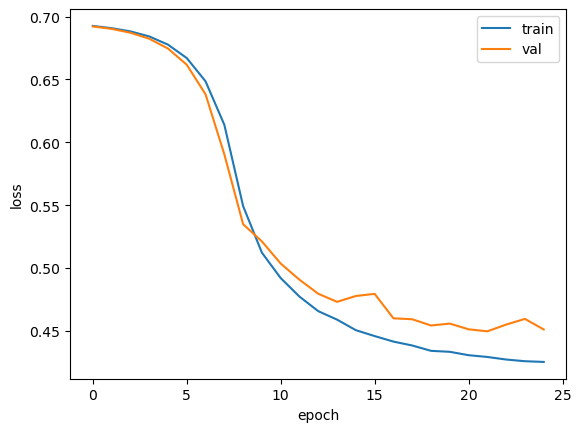

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()